In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#Importing the other necessary libraries
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing OpenCV - the computer vision library
import cv2

In [3]:
from scipy import signal
from skimage.filters import threshold_otsu

In [9]:
path='/Users/StevenTseng/Desktop/mouse.jpg'

array([[[664, 405]],

       [[664, 406]],

       [[665, 406]]], dtype=int32)

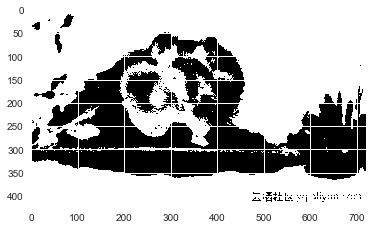

In [40]:
mouseimg=cv2.imread(str(path))
grayimg=cv2.cvtColor(mouseimg,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(grayimg,threshold_otsu(grayimg),255,0)
image,contours,hierarchy=cv2.findContours(thresh,1,2)
cnt=contours[1]

x,y,w,h=cv2.boundingRect(cnt)
img=cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),10)
plt.imshow(img)

In [44]:
mask=np.zeros(grayimg.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)

array([[405, 664],
       [406, 664],
       [406, 665]])

In [8]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 130


In [114]:
mask=np.where(grayimg>thresh_val,1,0)

In [115]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'K-Means')

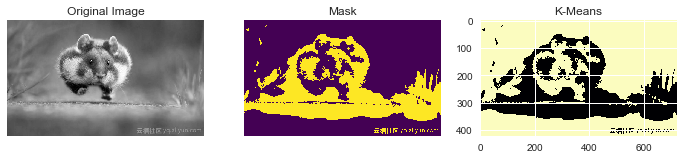

In [125]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])


plt.subplot(1,3,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')
plt.xticks([])
plt.yticks([])


kmeans=KMeans(n_clusters=2) #2 as we're still trying to seperate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.subplot(1,3,3)
plt.imshow(kmeans.labels_.reshape(422,720),cmap='magma')
plt.title('K-Means')


#### Edge Detection
Some important videos to watch before beginning this section - https://www.youtube.com/watch?v=XuD4C8vJzEQ&index=2&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF and https://www.youtube.com/watch?v=am36dePheDc&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=3F to get an idea of the underlying matrix algebra in edge detection. Credit to Andrew Ng for always explaining the intuition behind a particular method before going into the more complex math

The first thing we'll be trying out is the Sobel Filter. A clear and concise explanation of the filter and its usage in Python (OpenCV) is given here : https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html

#### Sobel Filter

Text(0.5, 1.0, 'Sobel Filter')

<Figure size 864x432 with 0 Axes>

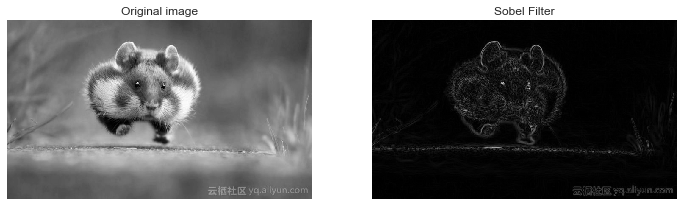

In [130]:
plt.figure(figsize=(12,6))

#Plotting the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Original image')

#cv2.Sobel arguments - the image, output depth, order of derivative of x, order of derivative of y, kernel/filter matrix size
sobelx = cv2.Sobel(grayimg,int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter (only 1,3,5,7)
sobely = cv2.Sobel(grayimg,int(cv2.CV_64F),0,1,ksize=3)
#Now to combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Filter')

### Canny 

(-0.5, 719.5, 421.5, -0.5)

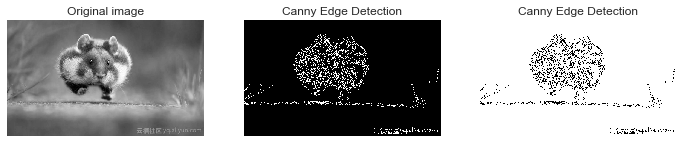

In [109]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

#Let's see how the Canny Edge Detector does on the image
plt.subplot(1,3,2)
canny = cv2.Canny(grayimg,80,100) # use flatten to use the intensity distribution plot
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
canny = cv2.Canny(grayimg,80,100) # use flatten to use the intensity distribution plot
plt.imshow(canny)
plt.title('Canny Edge Detection')
plt.axis('off')

# Convolution 

Text(0.5, 1.0, 'Canny edge detection')

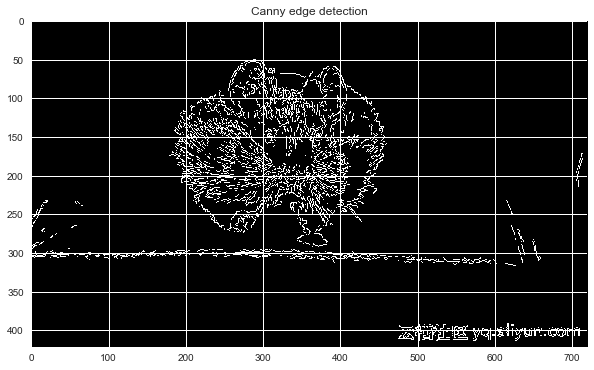

In [150]:
plt.figure(figsize=(12,6))
ppimg=cv2.cvtColor(mouseimg,cv2.COLOR_RGB2GRAY)
ppimg_canny=cv2.Canny(ppimg,100,150)
plt.imshow(ppimg_canny,cmap='gray')
plt.title('Canny edge detection')


### Basic Information

In [16]:
type(mouseimg),mouseimg.shape,mouseimg.ndim,mouseimg.dtype

(numpy.ndarray, (422, 720, 3), 3, dtype('uint8'))

In [17]:
print('Image size {}'.format(mouseimg.size))
print('Maximum RGB value in this image {}'.format(mouseimg.max()))
print('Minimum RGB value in this image {}'.format(mouseimg.min()))


Image size 911520
Maximum RGB value in this image 255
Minimum RGB value in this image 0


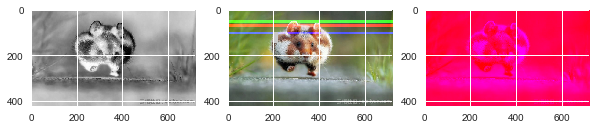

In [101]:
mouseimg=cv2.imread(str(path))
mouseimg=cv2.cvtColor(mouseimg,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(mouseimg[ : , : , 1])
pic=mouseimg.copy()
pic[65:80 , : , 0]=255
pic[50:60 , : , 1]=255
pic[100:110 , : ,2]=255
pic[100:150,200:220,[0,1,2]]=200

plt.subplot(1,3,2)
plt.imshow(pic)

plt.subplot(1,3,3)
pic2=mouseimg.copy()
pic2[:,:,0]=255
pic2[:,:,1]=0

plt.imshow(pic2)

### Put text

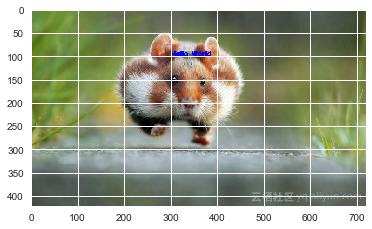

In [21]:
plt.imshow(cv2.putText(mouseimg, 'Hello World', (300,100), 0, 0.5, (0,0,255),2))

### Resize the image

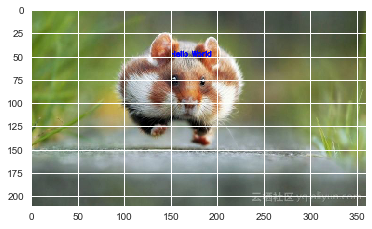

In [26]:
height, width = mouseimg.shape[:2]
res = cv2.resize(mouseimg,(int(width/2), int(height/2)), interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

### Image Moving

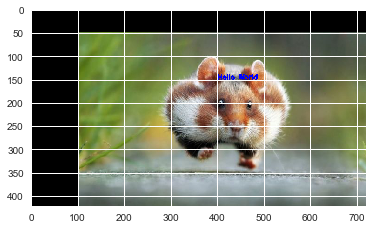

In [34]:
rows,cols = mouseimg.shape[:2]
 
M = np.float32([[1,0,100],[0,1,50]]) # x move 100, y move 50
move = cv2.warpAffine(mouseimg,M,(cols,rows))
 
plt.imshow(move)

### Get Rotation

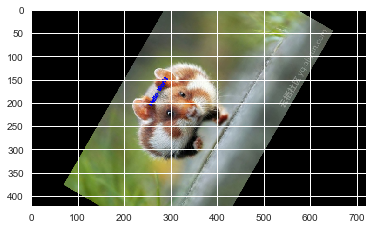

In [43]:
rows,cols = mouseimg.shape[:2]
 
M = cv2.getRotationMatrix2D((cols/2,rows/2),60,0.8) #(Point2f center, angle, image rescale)

rot = cv2.warpAffine(mouseimg,M,(cols,rows))
plt.imshow(rot)

#### AffineTransformation

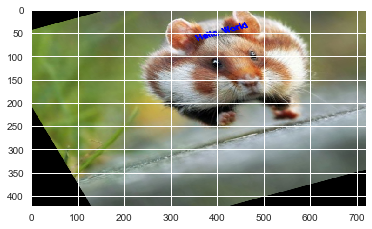

In [45]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(mouseimg,M,(cols,rows))
plt.imshow(dst)


### Color Transformation

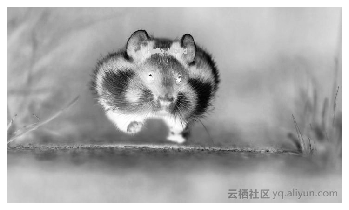

In [50]:
cortrans=cv2.cvtColor(mouseimg,cv2.COLOR_BGR2GRAY)
plt.xticks([])
plt.yticks([])
plt.imshow(cortrans)


### RGB Split & Merge

(-0.5, 719.5, 421.5, -0.5)

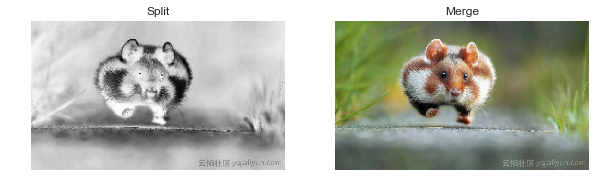

In [122]:
plt.figure(figsize=(10,7))
# split 
plt.subplot(1,2,1)
b,g,r = cv2.split(mouseimg)
plt.imshow(r)
plt.title('Split')
plt.axis('off')

# merge 
plt.subplot(1,2,2)
mouseimg=cv2.merge((b,g,r))
plt.imshow(mouseimg)
plt.title('Merge')
plt.axis('off')

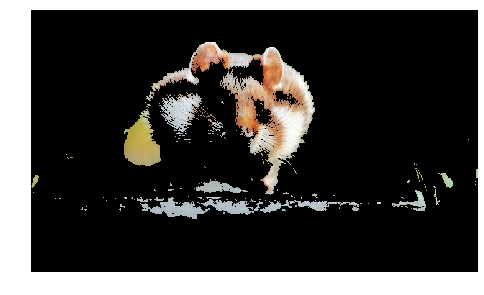

In [96]:
# 只有红色通道值,像素值高于170
mouseimg2=mouseimg.copy()
red_mask=mouseimg2[:,:,0]<170
mouseimg2[red_mask]=0

plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(mouseimg2)  
#

### Intensity Transformation


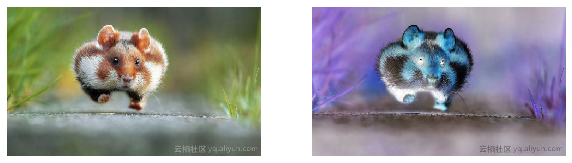

In [89]:
plt.figure(figsize=(10,5))
mouseimg=cv2.imread(str(path))
mouseimg=cv2.cvtColor(mouseimg,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(mouseimg)

plt.subplot(1,2,2)
neg=mouseimg.max()-mouseimg
plt.xticks([])
plt.yticks([])
plt.imshow(neg)